In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import h5py
import statistics as stats

In [2]:
file = h5py.File("Data/h5pytensors.hdf5", "r")
constants = file["Constants1"]
cellData = file["Cell_Data1"]
eventData = file["Event_Data1"]
clusterData = file["Cluster_Data1"]

In [3]:
keys = {
    "cell_x" : 0,
    "cell_y" : 1,
    "cell_z" : 2,
    "cell_eta" : 3,
    "cell_phi" : 4,
    "cell_subCalo" : 5,
    "cell_hashID" : 6,
    "cell_noiseSigma" : 7,
    "cell_sampling" : 0,
    "cell_e" : 1,
    "cell_time" : 2,
    "cell_weight" : 3,
    "cell_truth" : 4,
    "cell_cluster_index" : 5,
    "cell_to_cluster_e" : 6,
    "cell_to_cluster_eta" : 7,
    "cell_to_cluster_phi" : 8,
    "cell_SNR" : 9,
    "cluster_e" : 0,
    "cluster_eta" : 1,
    "cluster_phi" : 2
}

In [4]:
def extractCellData(data):
    cell_samplingData = data[:, :, keys["cell_sampling"]]
    cell_eData = data[:, :, keys["cell_e"]]
    cell_timeData = data[:, :, keys["cell_time"]]
    cell_weightData = data[:, :, keys["cell_weight"]]
    cell_truthData = data[:, :, keys["cell_truth"]]
    cell_cluster_indexData = data[:, :, keys["cell_cluster_index"]]
    cell_to_cluster_eData = data[:, :, keys["cell_to_cluster_e"]]
    cell_to_cluster_etaData = data[:, :, keys["cell_to_cluster_eta"]]
    cell_to_cluster_phiData = data[:, :, keys["cell_to_cluster_phi"]]
    cell_SNRData = data[:, :, keys["cell_SNR"]]

    return cell_samplingData, cell_eData, cell_timeData, cell_weightData, cell_truthData, cell_cluster_indexData, cell_to_cluster_eData, cell_to_cluster_etaData, cell_to_cluster_phiData, cell_SNRData

In [5]:
def extractConstantsData(data):
    cell_xData = data[:, keys["cell_x"]]
    cell_yData = data[:, keys["cell_y"]]
    cell_zData = data[:, keys["cell_z"]]
    cell_etaData = data[:, keys["cell_eta"]]
    cell_phiData = data[:, keys["cell_phi"]]
    cell_subCaloData = data[:, keys["cell_subCalo"]]
    cell_hashIDData = data[:, keys["cell_hashID"]]
    cell_noiseSigmaData = data[:, keys["cell_noiseSigma"]]
    
    return cell_xData, cell_yData, cell_zData, cell_etaData, cell_phiData, cell_subCaloData, cell_hashIDData, cell_noiseSigmaData

In [6]:
def extractClusterData(data):
    
    cluster_eData = data[:, :, keys["cluster_e"]]
    cluster_etaData = data[:, :, keys["cluster_eta"]]
    cluster_phiData = data[:, :, keys["cluster_phi"]]
        
    return cluster_eData, cluster_etaData, cluster_phiData

In [7]:
cell_x, cell_y, cell_z, cell_eta, cell_phi, cell_subCalo, cell_hashID, cell_noiseSigma = extractConstantsData(constants)
cell_sampling, cell_e, cell_time, cell_weight, cell_truth, cell_cluster_index, cell_to_cluster_e, cell_to_cluster_eta, cell_to_cluster_phi, cell_SNR  = extractCellData(cellData)
cluster_e, cluster_eta, cluster_phi = extractClusterData(clusterData)

In [8]:
cell_subCalo = np.array(cell_subCalo)
indices_tile = [i for i in range(len(cell_subCalo)) if cell_subCalo[i] == 3]

In [9]:
def countZeroesAndOnes(data):
    zeroes = 0
    ones = 0
    for datapoint in data:
        if datapoint == 0:
            zeroes = zeroes + 1
        elif datapoint == 1:
            ones = ones + 1
    return [zeroes, ones]

In [10]:
def makePieChart(data, title):
    plt.pie(countZeroesAndOnes(data), labels = ["Unmatched", "Matched"], autopct="%1.1f%%")
    plt.title(title)
    plt.show()

In [11]:
def makeBarChart(data, title):
    fig, ax = plt.subplots()
    
    ax.bar(["Unmatched", "Matched"], countZeroesAndOnes(data), color = ["tab:red", "tab:blue"])
    plt.ylabel("Number of Events")
    plt.title(title)
    plt.show()

In [12]:
def makeHist(name):
    plt.hist(tree.arrays()[name][0])
    plt.show()

In [13]:
def makeEnergyTruthArrays(truth, energy):
    falseEnergy = []
    trueEnergy = []
    for i in range(0, len(truth)):
        if truth[i] == 0:
            falseEnergy.append(energy[i])
        else:
            trueEnergy.append(energy[i])
    return falseEnergy, trueEnergy 

In [14]:
def normalize(hist):
    normalizedHist = hist/sum(hist)
    
    return normalizedHist

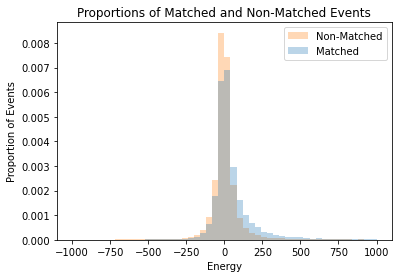

In [15]:
numBins = 50
falseEnergy, trueEnergy = makeEnergyTruthArrays(cell_truth[0], cell_e[0])
plt.hist(falseEnergy, bins = numBins, density = 1, range = (-1000, 1000), alpha = 0.3, color = "tab:orange", label = "Non-Matched")
plt.hist(trueEnergy, bins = numBins, density = 1, range = (-1000, 1000), alpha = 0.3, color = "tab:blue", label = "Matched")
plt.legend()
plt.xlabel("Energy")
plt.ylabel("Proportion of Events")
plt.title("Proportions of Matched and Non-Matched Events")
plt.show()

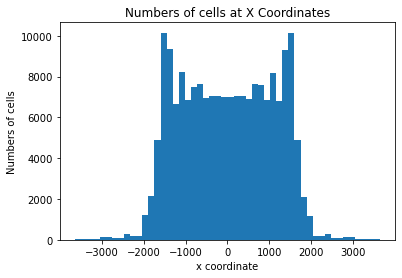

In [16]:
# cells contributing to a() cluster
#LAREM = 0, LARHEC = 1, LARFCAL = 2, TILE = 3, LARMINIFCAL = 4, NSUBCALO = 5,
plt.hist(cell_x, bins = numBins)
plt.xlabel("x coordinate")
plt.ylabel("Numbers of cells")
plt.title("Numbers of cells at X Coordinates")
plt.show()

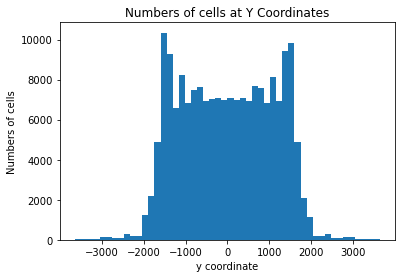

In [17]:
plt.hist(cell_y, bins = numBins)
plt.xlabel("y coordinate")
plt.ylabel("Numbers of cells")
plt.title("Numbers of cells at Y Coordinates")
plt.show()

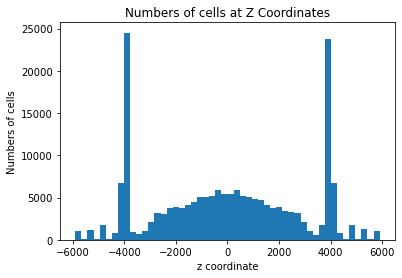

In [18]:
plt.hist(cell_z, bins = numBins)
plt.xlabel("z coordinate")
plt.ylabel("Numbers of cells")
plt.title("Numbers of cells at Z Coordinates")
plt.show()

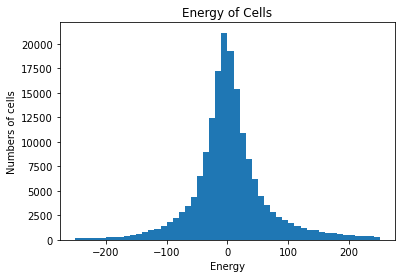

In [19]:
plt.hist(cell_e[0], range = (-250, 250), bins = numBins)
plt.xlabel("Energy")
plt.ylabel("Numbers of cells")
plt.title("Energy of Cells")
plt.show()

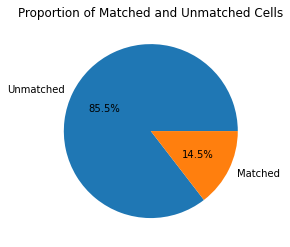

In [20]:
makePieChart(cell_truth[0], "Proportion of Matched and Unmatched Cells")

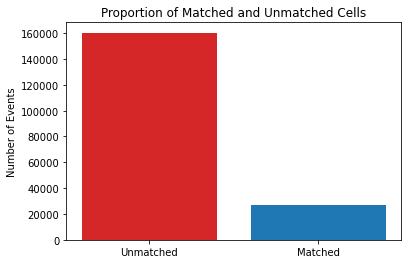

In [21]:
makeBarChart(cell_truth[0], "Proportion of Matched and Unmatched Cells")

In [22]:
indices_negE = [i for i in range(len(cell_e[0])) if cell_e[0][i] < 0]

In [23]:
cell_truth_slice = np.array(cell_truth[0])
cellTruthwithNegE = cell_truth_slice[indices_negE]

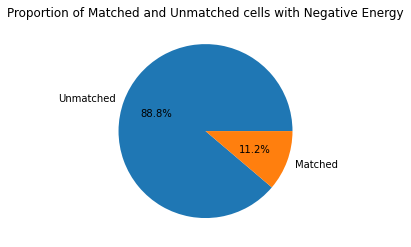

In [24]:
makePieChart(cellTruthwithNegE, "Proportion of Matched and Unmatched cells with Negative Energy")

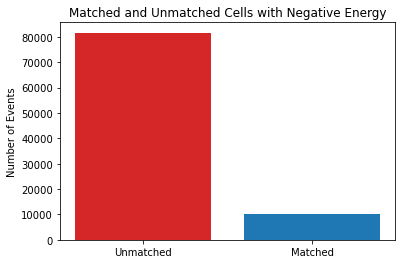

In [25]:
makeBarChart(cellTruthwithNegE, "Matched and Unmatched Cells with Negative Energy")

In [26]:
def makeEnergyMap(x, y, energy):
    fig, ax = plt.subplots()
    
    plot = ax.pcolormesh([x, y, energy], vmin = 0.0, vmax = 1.0)
    
    plt.colorbar(plot, label = "Energy normalized from 0 to 1")
    plt.xlabel("Eta")
    plt.ylabel("Phi")
    
    plt.show()

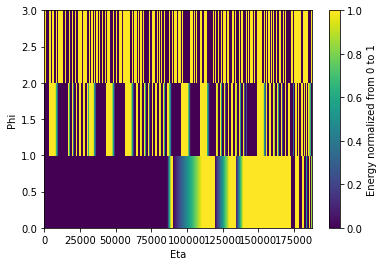

In [27]:
makeEnergyMap(cell_eta, cell_phi, cell_e[0])

In [28]:
def countClusters(data):
    clusterCount = []
    for event in data:
        count = 0
        for cluster in event:
            if cluster != 0:
                count = count + 1
        clusterCount.append(count)
    return clusterCount

In [29]:
clusterCounts = countClusters(cluster_e)

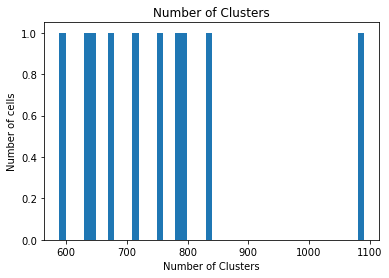

In [30]:
plt.hist(clusterCounts, bins = numBins)
plt.xlabel("Number of Clusters")
plt.ylabel("Number of cells")
plt.title("Number of Clusters")
plt.show()

In [31]:
def combineData(data):
    first = True
    for event in data:
        if first:
            combinedData = event
            first = False
        else:
            combinedData = np.concatenate((combinedData, event))
    return combinedData

In [32]:
combinedCellE = combineData(cell_e)

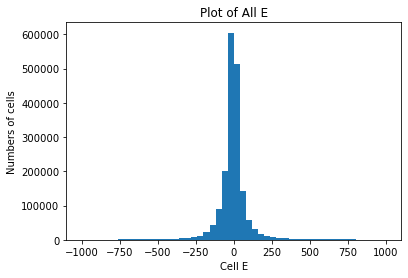

In [33]:
plt.hist(combinedCellE, range = (-1000, 1000), bins = numBins)
plt.xlabel("Cell E")
plt.ylabel("Numbers of cells")
plt.title("Plot of All E")
plt.show()

In [34]:
def plotStandardDev(data, sigma, title):
    standardDeviation = abs(sigma)
    standardDeviation2 = 2*sigma
    standardDeviation3 = 3*sigma
    numberOfDatapoints = float(len(data))
    
    standardDeviationNumber = float(len(data[data < standardDeviation]))
    standardDeviation2Number = float(len(data[(data >= standardDeviation) & (data < standardDeviation2)]))
    standardDeviation3Number = float(len(data[(data >= standardDeviation2) & (data < standardDeviation3)]))
    standardDeviation4Number = float(len(data[data >= standardDeviation3]))
    
    standardDeviationPercentage = standardDeviationNumber/numberOfDatapoints*100.0
    standardDeviation2Percentage = standardDeviation2Number/numberOfDatapoints*100.0
    standardDeviation3Percentage = standardDeviation3Number/numberOfDatapoints*100.0
    standardDeviation4Percentage = standardDeviation4Number/numberOfDatapoints*100.0
    
    dataToPlot = [standardDeviationPercentage, standardDeviation2Percentage, standardDeviation3Percentage, standardDeviation4Percentage]
    labels = ["σ", "2σ", "3σ", ">3σ"]
    
    plt.bar(labels, dataToPlot)
    plt.ylabel("Percentage")
    plt.title(title)
    plt.show()

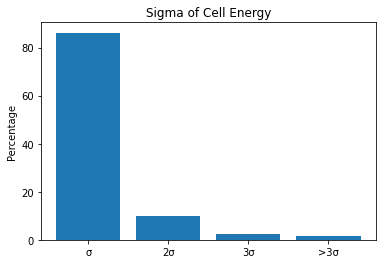

In [35]:
plotStandardDev(cell_e[0], cell_noiseSigma, "Sigma of Cell Energy")

In [36]:
empty_e = np.random.normal(loc = 0.0, scale = cell_noiseSigma, size = len(cell_noiseSigma))

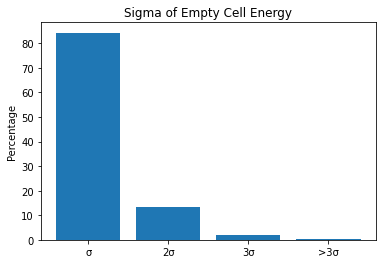

In [43]:
plotStandardDev(empty_e, cell_noiseSigma, "Sigma of Empty Cell Energy")

In [38]:
one_cell_e = cell_e[:, 2]

(array([1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([-10033.15917969,  -9794.74917725,  -9556.3391748 ,  -9317.92917236,
         -9079.51916992,  -8841.10916748,  -8602.69916504,  -8364.2891626 ,
         -8125.87916016,  -7887.46915771,  -7649.05915527,  -7410.64915283,
         -7172.23915039,  -6933.82914795,  -6695.41914551,  -6457.00914307,
         -6218.59914062,  -5980.18913818,  -5741.77913574,  -5503.3691333 ,
         -5264.95913086,  -5026.54912842,  -4788.13912598,  -4549.72912354,
         -4311.31912109,  -4072.90911865,  -3834.49911621,  -3596.08911377,
         -3357.67911133,  -3119.26910889,  -2880.85910645,  -2642.449104  ,
         -2404.03910156,  -2165.62909912,  -1927.21909668,  -1688.80909424,
         -1450.3990918 ,  -1211.98908936,   -973.57908691,   -735.16908447,
          -496

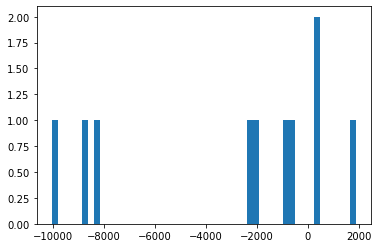

In [39]:
plt.hist(one_cell_e, bins = numBins)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 0., 1., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-2355.50448374, -2238.82544158, -2122.14639941, -2005.46735724,
        -1888.78831507, -1772.10927291, -1655.43023074, -1538.75118857,
        -1422.0721464 , -1305.39310424, -1188.71406207, -1072.0350199 ,
         -955.35597773,  -838.67693557,  -721.9978934 ,  -605.31885123,
         -488.63980906,  -371.9607669 ,  -255.28172473,  -138.60268256,
          -21.92364039,    94.75540177,   211.43444394,   328.11348611,
          444.79252828,   561.47157044,   678.15061261,   794.82965478,
          911.50869695,  1028.18773911,  1144.86678128,  1261.54582345,
         1378.22486562,  1494.90390778,  1611.58294995,  1728.26199212,
         1844.94103428,  1961.62007645,  2078.29911862,  2194.97816079,
         2311.65720295,  2428.33624512,  2545.01528729

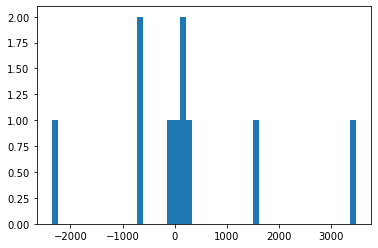

In [40]:
d = np.random.normal(loc = 0.0, scale = cell_noiseSigma[2], size = len(one_cell_e))
plt.hist(d, bins = numBins)

<ipython-input-41-52513c2d9af4>:4: RuntimeWarning: divide by zero encountered in log10
  energy_weights = np.log10(cell_e[4, :])
<ipython-input-41-52513c2d9af4>:4: RuntimeWarning: invalid value encountered in log10
  energy_weights = np.log10(cell_e[4, :])


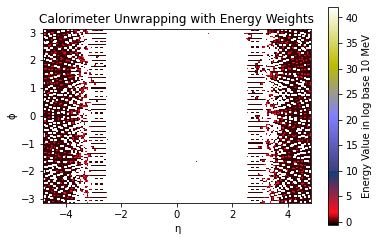

In [41]:
eta_bins = np.linspace(min(cell_eta), max(cell_eta), 200)
phi_bins = np.linspace(min(cell_phi), max(cell_phi), 200)

energy_weights = np.log10(cell_e[4, :])

hist1, eta_edges, phi_edges = np.histogram2d( cell_eta, cell_phi, bins = (eta_bins, phi_bins), weights = energy_weights)

color_map = "gist_stern"
_ = plt.imshow(hist1.T, extent = [eta_bins.min(), eta_bins.max(), phi_bins.min(), phi_bins.max()], cmap = color_map)

plt.colorbar(label = "Energy Value in log base 10 MeV")
plt.xlabel("η")
plt.ylabel("ϕ")
_ = plt.title("Calorimeter Unwrapping with Energy Weights")

In [42]:
noise_weights = np.log10(cell_sigma[4])
print(noise_weights)

hist2, eta_edges, phi_edges = np.histogram2d( cell_eta, cell_phi, bins = (eta_bins, phi_bins), weights = noise_weights)

_ = plt.imshow(hist2.T, extent = [eta_bins.min(), eta_bins.max(), phi_bins.min(), phi_bins.max()], cmap = color_map)
plt.colorbar(label = "Noise Frequency")
plt.xlabel("η")
plt.ylabel("ϕ")
_ = plt.title("Calorimeter Unwrapping with Noise Weights")

NameError: name 'cell_sigma' is not defined

In [ ]:
sigma_weights = cell_e[4]/cell_sigma[4]
sigma_weights = np.nan_to_num(sigma_weights)
sigma_weights[sigma_weights < 0.0001] = 0.0
sigma_weights[cell_truth[4] == 0] = 0.0

hist3, eta_edges, phi_edges = np.histogram2d( cell_eta, cell_phi, bins = (eta_bins, phi_bins), weights = sigma_weights)

_ = plt.imshow(hist3.T, extent = [eta_bins.min(), eta_bins.max(), phi_bins.min(), phi_bins.max()], cmap = color_map)
plt.colorbar(label = "σ frequency")
plt.xlabel("η")
plt.ylabel("ϕ")
_ = plt.title("Calorimeter Unwrapping with σ weights")

In [ ]:
hist4, cluster_eta_edges, cluster_phi_edges = np.histogram2d(
    cluster_eta[4], cluster_phi[4], bins=(eta_bins, phi_bins), weights=np.log10(cluster_e[4]))
# Create the plot
_ = plt.imshow(hist4.T, extent=[eta_bins.min(), eta_bins.max(
), phi_bins.min(), phi_bins.max()], cmap=color_map)
plt.colorbar(label='Energy frequency')
plt.xlabel('η')
plt.ylabel('ϕ')
_ = plt.title('Cluster Unwrapping with Energy weights')

In [ ]:
_ = plt.imshow(hist3.T, extent=[eta_bins.min(), eta_bins.max(
), phi_bins.min(), phi_bins.max()], cmap=color_map)
_ = plt.imshow(hist4.T, extent=[eta_bins.min(), eta_bins.max(
), phi_bins.min(), phi_bins.max()], cmap=color_map, alpha=0.3)
plt.colorbar(label='Energy frequency')
plt.xlabel('η')
plt.ylabel('ϕ')
_ = plt.title('Cluster Unwrapping with Cluster on top of Data')

In [ ]:
_ = plt.imshow(hist3.T, extent=[1.5, 2.5, 1.0, 1.5], cmap=color_map)
_ = plt.imshow(hist4.T, extent=[1.5, 2.5, 1.0, 1.5], cmap=color_map, alpha=0.3)
plt.colorbar(label='Energy frequency')
plt.xlabel('η')
plt.ylabel('ϕ')
_ = plt.title('Cluster Unwrapping with Cluster on top of Data')